# 多元数据的数据特征与相关分析

In [ ]:
# 计算两变量相关性

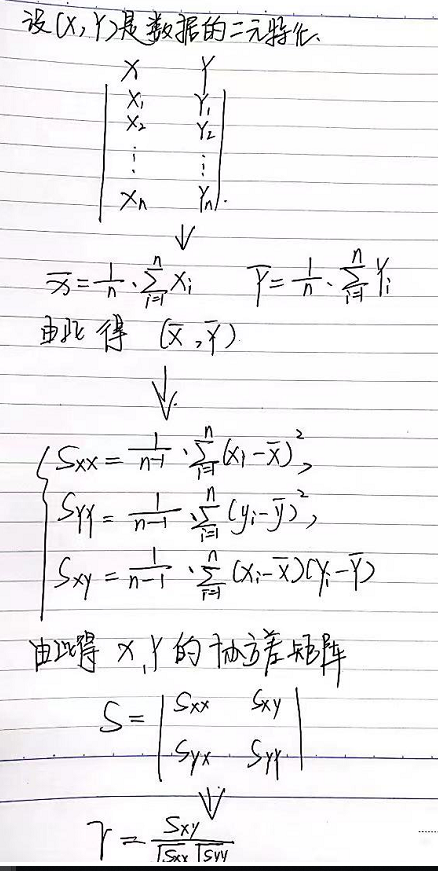

In [7]:
#举例子，有种矿石有x，y两种成分,量两成分之间是否存在怎样的共変性？
ore <- -data.frame(
x=c(67, 54, 72, 64, 39, 22, 58, 43, 46, 34),
y=c(24, 15, 23, 19, 16, 11, 20, 16, 17, 13)
)
ore

x,y
<dbl>,<dbl>
-67,-24
-54,-15
-72,-23
-64,-19
-39,-16
-22,-11
-58,-20
-43,-16
-46,-17


In [8]:
#一行代码解决问题
ore.r <- cor(ore)
ore.r

,x,y
x,1.0000000,0.9202595
y,0.9202595,1.0000000


In [9]:
#使用cov计算covariance matrix
cov(ore)

,x,y
x,252.7667,60.60000
y,60.6000,17.15556


In [ ]:
### 二元数据的相关性检验问题

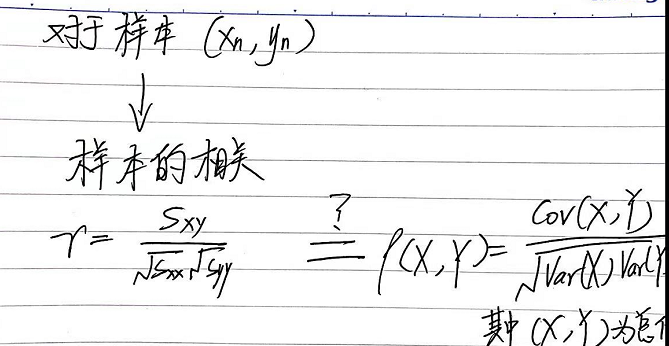


In [10]:
#两个问题（1）现有样本调节可以估计怎样的总体区间范围？  （2）由现有样本多大程度上能推测总体也有显著相关性？
cor(ore$x, ore$y)
cor.test(ore$x, ore$y)

[1] 0.9202595


	Pearson's product-moment correlation

data:  ore$x and ore$y
t = 6.6518, df = 8, p-value = 0.0001605
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6910290 0.9813009
sample estimates:
      cor 
0.9202595 


cor.test(x, y,
alternative = c("two.sided", "less", "greater"),
method = c("pearson", "kendall", "spearman"),
exact = NULL, conf.level = 0.95, ...)

其中x,y是数据向量（需长度相同）， alternative是备择假设（后面会专门有一课祥讲），
tw-.sided是选择双尾还是单尾，con.level是置信水平

### 多元数据的特征及相关矩阵

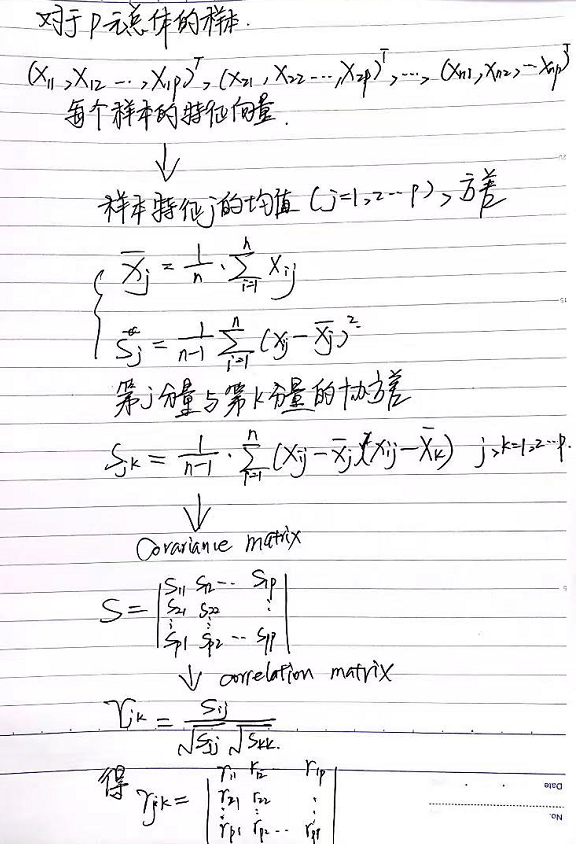

In [ ]:
# cor（）函数即可得到correlation matrix

In [11]:
#举例：求iris数据集中花朵各特征之间的相关性
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [12]:
head(iris[,1:4])
cor(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [13]:
#相关性检验
#cor.test只能两两计算
attach(iris)
cor.test(~ Sepal.Length+Sepal.Width,data=iris)


	Pearson's product-moment correlation

data:  Sepal.Length and Sepal.Width
t = -1.4403, df = 148, p-value = 0.1519
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.27269325  0.04351158
sample estimates:
       cor 
-0.1175698 


In [14]:
#推荐使用Hmisc包
library(Hmisc)
rcorr(as.matrix(iris[,1:4]))

Warning message:
"程辑包'Hmisc'是用R版本4.2.2 来建造的"
载入需要的程辑包：lattice

载入需要的程辑包：survival

载入需要的程辑包：Formula

载入需要的程辑包：ggplot2


载入程辑包：'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         1.00       -0.12         0.87        0.82
Sepal.Width         -0.12        1.00        -0.43       -0.37
Petal.Length         0.87       -0.43         1.00        0.96
Petal.Width          0.82       -0.37         0.96        1.00

n= 150 


P
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length              0.1519      0.0000       0.0000     
Sepal.Width  0.1519                   0.0000       0.0000     
Petal.Length 0.0000       0.0000                   0.0000     
Petal.Width  0.0000       0.0000      0.0000                  